# Table of Contents
### 1. Preparing Notebook
### 2. PII Info
### 3. Creating Regional Column
#### 3b. Creating Crosstab for Analysis
### 4. Creating exclusion flag for low activity customers
#### 4b. Exporting Data
### 5. Creating new variables
#### 5a. Creating 'age_group' variable
#### 5b. Creating 'income_group' variable
#### 5c. Creating day of the week variable
#### 5d. Creating time of day variable
### 6. Creating visualizations
#### 6a. Importing Department Data and Merging with current Data Frame
### Aggregating Customer Profiles
### 8. Exporting Data Frame

# 1. Preparing Notebook

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Setting up 'Path'
path = r'C:\Users\Matt\Documents\Data Analysis Course\02-07-2022 InstaCart Basket Analysis'

In [3]:
# Importing DataFrame
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined_customers_prods.pkl'))

In [4]:
# Checking DF
pd.set_option('display.max_columns', None)
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620


# 2. PII Info

#### Because the first and last names of the customers are randomized for this data, I don't feel the need to delete those columns. In a real life setting however, I would drop either just the last name column, or both first and last names.

# 3a. Creating Regional Column

In [5]:
# Making sure 'state' column has no mistakes
list_of_states = df_final['STATE'].unique()
print(list_of_states)

['Minnesota' 'Vermont' 'Wisconsin' 'Hawaii' 'District of Columbia'
 'Tennessee' 'Oregon' 'Alaska' 'Alabama' 'Indiana' 'Florida' 'Kansas'
 'North Carolina' 'Utah' 'Maine' 'North Dakota' 'South Dakota' 'Delaware'
 'Illinois' 'Wyoming' 'Maryland' 'Louisiana' 'New Jersey' 'Georgia'
 'Arkansas' 'California' 'Idaho' 'New Hampshire' 'West Virginia' 'Nevada'
 'New Mexico' 'New York' 'Rhode Island' 'Nebraska' 'Massachusetts' 'Texas'
 'Pennsylvania' 'Iowa' 'Kentucky' 'Michigan' 'Ohio' 'Oklahoma' 'Arizona'
 'Washington' 'Virginia' 'Connecticut' 'Mississippi' 'Colorado' 'Montana'
 'Missouri' 'South Carolina']


In [6]:
# Creating Region lists
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
#using np.select add regions column
cond=[df_final['STATE'].isin(Northeast),df_final['STATE'].isin(Midwest),df_final['STATE'].isin(South),df_final['STATE'].isin(West)]
values=['Northeast','Midwest','South','West']
df_final['region']=np.select(cond,values)

In [8]:
# Checking new 'region' column
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest


# 3b. Creating Crosstab for Analysis

In [9]:
# Creating Crosstab
crosstab = pd.crosstab(df_final['region'], df_final['spending_flag'], dropna = False)

In [10]:
# Copy Crosstab to clipboard
crosstab.to_clipboard()
print(crosstab)

spending_flag  High Spender  Low Spender
region                                  
0                     25420      1246869
Midwest              155975      7441350
Northeast            108225      5614511
South                193091      9961770
West                 151534      7506114


In [14]:
crosstab_2 = pd.crosstab(index = df_final['region'], columns = df_final['Gender'], values = df_final['prices'], aggfunc = 'sum', dropna = False)

In [15]:
crosstab_2.to_clipboard()

#### There seems to be the same percentage of 'low spenders' to 'high spenders' across all regions.

# 4. Creating exclusion flag for low activity customers

In [11]:
#Create activity flag for low activity
df_final.loc[df_final['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [12]:
# Create activity flag for high activity
df_final.loc[df_final['max_order'] > 5, 'activity_flag'] = 'High activity'

In [13]:
# Checking Value Count for 'activity_flag'
df_final['activity_flag'].value_counts()

High activity    30171424
Low activity      1440295
Name: activity_flag, dtype: int64

In [14]:
# Checking shape of df_final
df_final.shape

(32404859, 33)

In [15]:
# Checking new column
df_final.head(3000)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6184,Clementines,32,4,4.3,32986,8703,prior,6,4,11,2.00000,3,1,both,Low range product,Least busy,Most Orders,99,Loyal Customer,6.593459,Low Spender,1.0,Frequent Customer,Evelyn,Craig,Female,Maryland,49,married,57501,South,High activity
2996,6184,Clementines,32,4,4.3,3294752,8703,prior,8,1,10,3.00000,5,1,both,Low range product,Busiest day,Most Orders,99,Loyal Customer,6.593459,Low Spender,1.0,Frequent Customer,Evelyn,Craig,Female,Maryland,49,married,57501,South,High activity
2997,6184,Clementines,32,4,4.3,472277,8703,prior,9,3,12,2.00000,2,1,both,Low range product,Least busy,Most Orders,99,Loyal Customer,6.593459,Low Spender,1.0,Frequent Customer,Evelyn,Craig,Female,Maryland,49,married,57501,South,High activity
2998,6184,Clementines,32,4,4.3,3281473,8703,prior,10,4,12,1.00000,2,1,both,Low range product,Least busy,Most Orders,99,Loyal Customer,6.593459,Low Spender,1.0,Frequent Customer,Evelyn,Craig,Female,Maryland,49,married,57501,South,High activity


In [16]:
# Creating Subset of data with only 'high_activity' customers
df_high = df_final[df_final['activity_flag'] == 'High activity']

In [17]:
df_high.head(50)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,prior,17,5,14,19.00000,1,0,both,Low range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
6,4913,Table Water Crackers,78,19,4.4,894221,138,prior,23,5,13,24.00000,3,0,both,Low range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
7,6184,Clementines,32,4,4.3,1977647,138,prior,30,6,17,20.00000,3,0,both,Low range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
8,6901,Raisin Bran,121,14,2.9,1154289,138,prior,18,1,7,3.00000,2,0,both,Low range product,Busiest day,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,prior,2,0,12,9.00000,3,0,both,Mid range product,Busiest day,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity


In [18]:
df_high.shape

(30171424, 33)

#### The number of rows match the number of 'high activity' customers from the count above.

# 4b. Export Data

In [19]:
#Export DF as sales_cust_activity.pkl
df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

# 5. Creating New Variables

## 5a. Creating 'age_group' variable

In [20]:
# Creating new 'age_group' variable using .loc
# Checking to see the range of ages
df_final['Age'].value_counts().sort_index()


18    500474
19    519606
20    502848
21    512527
22    513853
       ...  
77    502120
78    495311
79    529742
80    515246
81    509284
Name: Age, Length: 64, dtype: int64

In [21]:
df_final.loc[(df_final['Age'] >= 18) & (df_final['Age'] <  30), 'age_group'] = '18-29'

In [22]:
df_final.loc[(df_final['Age'] >= 30) & (df_final['Age'] <  40), 'age_group'] = '30-39'

In [23]:
df_final.loc[(df_final['Age'] >= 40) & (df_final['Age'] <  50), 'age_group'] = '40-49'

In [24]:
df_final.loc[(df_final['Age'] >= 50) & (df_final['Age'] <  60), 'age_group'] = '50-59'

In [25]:
df_final.loc[(df_final['Age'] >= 60) & (df_final['Age'] <  70), 'age_group'] = '60-69'

In [26]:
df_final.loc[(df_final['Age'] >= 70) & (df_final['Age'] <  80), 'age_group'] = '70-79'

In [27]:
df_final.loc[df_final['Age'] >= 80, 'age_group'] = '80+'

In [28]:
# Check new variable value count
df_final['age_group'].value_counts().sort_index()

18-29    6090441
30-39    5073751
40-49    5109237
50-59    5064175
60-69    4987264
70-79    5055461
80+      1024530
Name: age_group, dtype: int64

## 5b. Creating 'income_group' variable

In [29]:
# Checking the range of 'income'
df_final['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 108012, dtype: int64

In [30]:
df_final.loc[(df_final['income'] >=25000) & (df_final['income'] <50000), 'income_group'] = '25k-50k'

In [31]:
df_final.loc[(df_final['income'] >=50000) & (df_final['income'] <75000), 'income_group'] = '50k-75k'

In [32]:
df_final.loc[(df_final['income'] >=75000) & (df_final['income'] <100000), 'income_group'] = '75k-100k'

In [33]:
df_final.loc[(df_final['income'] >=100000) & (df_final['income'] <125000), 'income_group'] = '100k-125k'

In [34]:
df_final.loc[df_final['income'] >=125000, 'income_group'] = '125k+'

In [35]:
# Checking Values for 'income_group'
df_final['income_group'].value_counts()

125k+        8630957
75k-100k     7147327
50k-75k      6848683
100k-125k    6183809
25k-50k      3594083
Name: income_group, dtype: int64

In [36]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income,region,activity_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k


## 5c. Creating day of the week variable

In [37]:
df_final.loc[df_final['order_dow'] == 0, 'Day_of_Week'] = 'Saturday'

In [38]:
df_final.loc[df_final['order_dow'] == 1, 'Day_of_Week'] = 'Sunday'

In [39]:
df_final.loc[df_final['order_dow'] == 2, 'Day_of_Week'] = 'Monday'

In [40]:
df_final.loc[df_final['order_dow'] == 3, 'Day_of_Week'] = 'Tuesday'

In [41]:
df_final.loc[df_final['order_dow'] == 4, 'Day_of_Week'] = 'Wednesday'

In [42]:
df_final.loc[df_final['order_dow'] == 5, 'Day_of_Week'] = 'Thursday'

In [43]:
df_final.loc[df_final['order_dow'] == 6, 'Day_of_Week'] = 'Friday'

In [44]:
df_final['Day_of_Week'].value_counts()

Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: Day_of_Week, dtype: int64

## 5d. Creating time of day variable

In [45]:
# Checking 'order_hour_of_day' values
df_final['order_hour_of_day'].value_counts().sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

In [46]:
# Creating variable for Midnight to 9am as 'Morning'
df_final.loc[(df_final['order_hour_of_day'] >=0) & (df_final['order_hour_of_day'] <=9), 'time_of_day'] = 'Morning'

In [47]:
# Creating variable for 10am-3pm as 'Midday'
df_final.loc[(df_final['order_hour_of_day'] >=10) & (df_final['order_hour_of_day'] <=15), 'time_of_day'] = 'Midday'

In [48]:
# Creating variable for 4pm-Midnight as 'Evening/Night'
df_final.loc[(df_final['order_hour_of_day'] >=16) & (df_final['order_hour_of_day'] <=23), 'time_of_day'] = 'Evening/Night'

In [49]:
# Checking values
df_final['time_of_day'].value_counts().sort_index()

Evening/Night    10325997
Midday           16128666
Morning           5950196
Name: time_of_day, dtype: int64

# 6. Creating visualizations

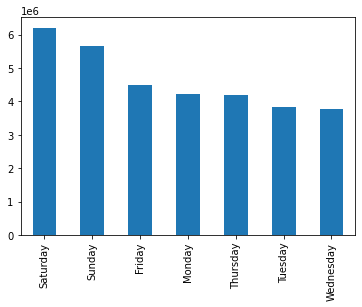

In [50]:
# Bar chart to show which day of the week is the busiest
bar_day_of_week = df_final['Day_of_Week'].value_counts().plot.bar()

In [51]:
# Exporting chart
bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_of_week.png'))

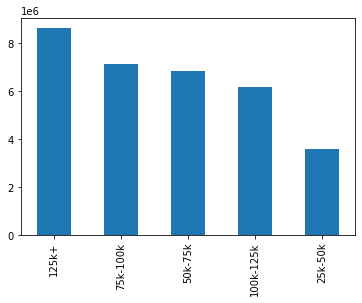

In [52]:
# Bar chart to show number of customers in each income level
bar_income_level = df_final['income_group'].value_counts().plot.bar()

In [53]:
bar_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_level.png'))

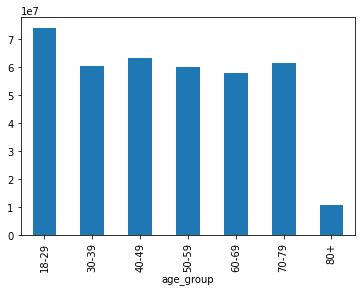

In [54]:
# Bar chart to show how much each age group contributes to total sales numbers
bar_sales_income = df_final.groupby(['age_group'])['prices'].agg('sum').plot.bar()

In [55]:
bar_sales_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sales_age_group.png'))

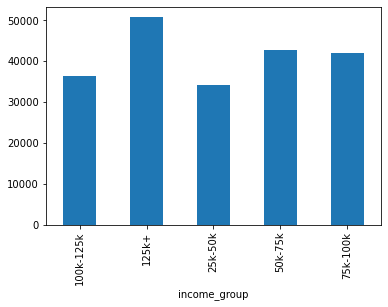

In [56]:
# Bar chart to show how many separate users we have in each income level
bar_user_income_level = df_final.groupby('income_group')['user_id'].nunique().plot.bar()

In [57]:
bar_user_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_user_income_level.png'))

# Importing Department Data and Merging with current Data Frame

In [81]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [82]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [83]:
df_dep_T = df_dep.T

In [107]:
# Creating new Department column
df_final.loc[df_final['department_id'] == 1, 'department'] = 'frozen'
df_final.loc[df_final['department_id'] == 2, 'department'] = 'other'
df_final.loc[df_final['department_id'] == 3, 'department'] = 'bakery'
df_final.loc[df_final['department_id'] == 4, 'department'] = 'produce'
df_final.loc[df_final['department_id'] == 5, 'department'] = 'alcohol'
df_final.loc[df_final['department_id'] == 6, 'department'] = 'international'
df_final.loc[df_final['department_id'] == 7, 'department'] = 'beverages'
df_final.loc[df_final['department_id'] == 8, 'department'] = 'pets'
df_final.loc[df_final['department_id'] == 9, 'department'] = 'dry goods pasta'
df_final.loc[df_final['department_id'] == 10, 'department'] = 'bulk'
df_final.loc[df_final['department_id'] == 11, 'department'] = 'personal care'
df_final.loc[df_final['department_id'] == 12, 'department'] = 'meat seafood'
df_final.loc[df_final['department_id'] == 13, 'department'] = 'pantry'
df_final.loc[df_final['department_id'] == 14, 'department'] = 'breakfast'
df_final.loc[df_final['department_id'] == 15, 'department'] = 'canned goods'
df_final.loc[df_final['department_id'] == 16, 'department'] = 'dairy eggs'
df_final.loc[df_final['department_id'] == 17, 'department'] = 'households'
df_final.loc[df_final['department_id'] == 18, 'department'] = 'babies'
df_final.loc[df_final['department_id'] == 19, 'department'] = 'snacks'
df_final.loc[df_final['department_id'] == 20, 'department'] = 'deli'
df_final.loc[df_final['department_id'] == 21, 'department'] = 'missing'

# 7. Aggregating Customer profiles

In [108]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,fam_status,income,region,activity_flag,age_group,income_group,Day_of_Week,time_of_day,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k,Friday,Midday,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.00000,1,1,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k,Friday,Evening/Night,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,11.11484,4,0,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k,Thursday,Midday,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.00000,1,1,both,High range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k,Thursday,Midday,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.00000,5,0,both,Mid range product,Regularly busy,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,married,49620,Midwest,High activity,80+,25k-50k,Friday,Midday,bulk


In [109]:
# Checking relation between age group and shopping expenditure
df_final.groupby('age_group').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                mean min max
age_group                   
18-29      32.996662   3  99
30-39      33.265472   3  99
40-49      33.051554   3  99
50-59      33.056627   3  99
60-69      32.992907   1  99
70-79      32.861105   2  99
80+        33.538049   3  99

In [110]:
# Checking relation between age group and frequency of purchases
df_final.groupby('age_group').agg({'median_days_since_order' : ['mean', 'min', 'max']})

median_days_since_order           
                             mean  min   max
age_group                                   
18-29                   10.030033  0.0  30.0
30-39                   10.043396  0.0  30.0
40-49                   10.031641  0.0  30.0
50-59                   10.041309  0.0  30.0
60-69                   10.016410  0.0  30.0
70-79                   10.019406  0.0  30.0
80+                      9.984603  0.0  30.0

#### Based on the two charts above, there isn't much of a substantive difference in the frequency and amount of shopping based on age group. 

In [111]:
# Checking to see the relation between family status and average spending amount
df_final.groupby('fam_status').agg({'median_days_since_order' : ['mean']})

,median_days_since_order
,mean
fam_status,
divorced/widowed,9.954947
living with parents and siblings,9.953724
married,10.046306
single,10.015208


In [112]:
# Checking relation between family status and total amount spent
df_final.groupby('fam_status').agg({'prices' : ['sum']})

,prices
,sum
fam_status,
divorced/widowed,31747431.8
living with parents and siblings,16791119.6
married,273209824.9
single,66469146.3


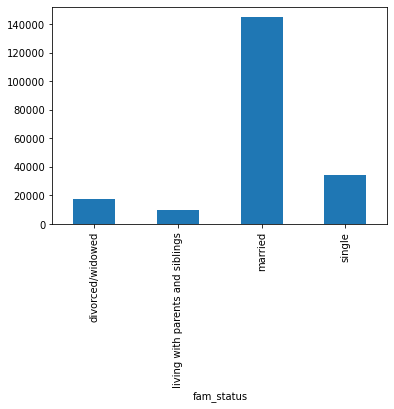

In [113]:
Family_status_bar = df_final.groupby('fam_status')['user_id'].nunique().plot.bar()

In [115]:
Family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status_bar_users.png'))

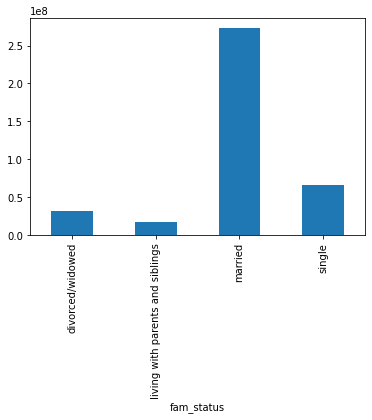

In [116]:
family_status_bar_2 = df_final.groupby('fam_status')['prices'].agg('sum').plot.bar()

#### As expected, married customers take up the vast majority of total numbers in users and in total amount spent.

In [118]:
family_status_bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status_bar_sum.png'))

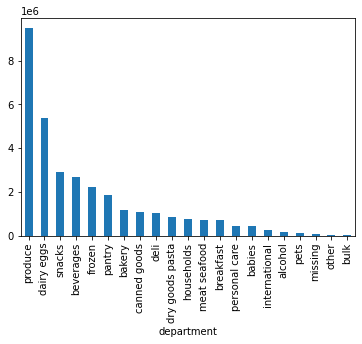

In [119]:
# Seeing which department is responsible for the most sales
product_orders_bar = df_final.groupby(['department'])['order_id'].agg('count').sort_values(ascending=False).plot.bar()

In [121]:
product_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_total_bar.png'))

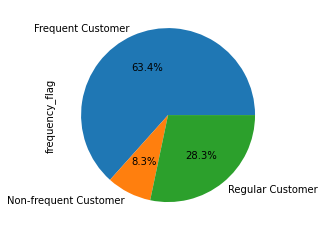

In [123]:
# Checking to see what percentage of customers 
type_of_customer_pie = df_final['frequency_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
type_of_customer_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'type_of_customer_pie.png'))

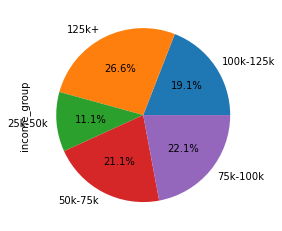

In [128]:
# Pie chart showing percetanges of each income group
income_pie = df_final['income_group'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
income_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_pie.png'))

In [129]:
# Regional sales for each department
crosstab_department_region = pd.crosstab(df_final['department'], df_final['region'], dropna = False)
print(crosstab_department_region)

region                0  Midwest  Northeast    South     West
department                                                   
alcohol            6886    36186      26542    48517    35565
babies            16081    98983      75139   134548    99051
bakery            46620   273869     208599   365344   277996
beverages        108837   625574     483418   844562   625732
breakfast         27880   163551     123574   220484   167544
bulk               1498     8193       5802    10766     8314
canned goods      42124   250702     186755   334434   254043
dairy eggs       210585  1264223     954026  1691315  1278598
deli              40216   245678     186817   329717   248821
dry goods pasta   33276   203769     151816   270804   206962
frozen            86913   524096     390918   705187   527629
households        29876   175824     131485   228076   173405
international     10264    63736      46891    84182    64180
meat seafood      27655   166129     124620   222295   168228
missing 

# 8. Exporting Data Frame

In [130]:
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data_frame.pkl'))